In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {'Country': ['Belgium', 'India', 'Brazil','Brazil'],
 'Capital': ['Brussels', 'Delhi', 'Brasília','SaoPo'],
 'Pop': [11190, 130317, 20784,13141]}

In [3]:
df = pd.DataFrame(data)
df

,Country,Capital,Pop
0,Belgium,Brussels,11190
1,India,Delhi,130317
2,Brazil,Brasília,20784
3,Brazil,SaoPo,13141


In [240]:
df.iloc[:,:2]

,Country,Capital
0,Belgium,Brussels
1,India,Delhi
2,Brazil,Brasília
3,Brazil,SaoPo


In [241]:
df.iat[2,0]

'Brazil'

In [242]:
df.loc[[0,1],'Country':'Capital']

,Country,Capital
0,Belgium,Brussels
1,India,Delhi


In [243]:
df.at[0,'Country']

'Belgium'

In [244]:
df.sum()

Country      BelgiumIndiaBrazilBrazil
Capital    BrusselsDelhiBrasíliaSaoPo
Pop                            175432
dtype: object

In [245]:
df.count()

Country    4
Capital    4
Pop        4
dtype: int64

In [4]:
a=3
b=11
c=7

c,b,a = a,b,c
print(a,b,c) #Swap Variables

7 11 3


In [247]:
df['Popcumsum'] = df.Pop.cumsum()
print(df)
print(df.cumsum())

   Country   Capital     Pop  Popcumsum
0  Belgium  Brussels   11190      11190
1    India     Delhi  130317     141507
2   Brazil  Brasília   20784     162291
3   Brazil     SaoPo   13141     175432
                    Country                     Capital     Pop  Popcumsum
0                   Belgium                    Brussels   11190      11190
1              BelgiumIndia               BrusselsDelhi  141507     152697
2        BelgiumIndiaBrazil       BrusselsDelhiBrasília  162291     314988
3  BelgiumIndiaBrazilBrazil  BrusselsDelhiBrasíliaSaoPo  175432     490420


In [248]:
f= lambda x:x*2
print(df.apply(f))
print(df.applymap(f))

          Country           Capital     Pop  Popcumsum
0  BelgiumBelgium  BrusselsBrussels   22380      22380
1      IndiaIndia        DelhiDelhi  260634     283014
2    BrazilBrazil  BrasíliaBrasília   41568     324582
3    BrazilBrazil        SaoPoSaoPo   26282     350864
          Country           Capital     Pop  Popcumsum
0  BelgiumBelgium  BrusselsBrussels   22380      22380
1      IndiaIndia        DelhiDelhi  260634     283014
2    BrazilBrazil  BrasíliaBrasília   41568     324582
3    BrazilBrazil        SaoPoSaoPo   26282     350864


In [249]:
print(df.apply(lambda x:len(str(x))))

print(df.applymap(lambda x: len(str(x))))

Country      80
Capital      84
Pop          72
Popcumsum    78
dtype: int64
   Country  Capital  Pop  Popcumsum
0        7        8    5          5
1        5        5    6          6
2        6        8    5          6
3        6        5    5          6


In [250]:
print(df.apply(lambda x: str(x)+"_X"))

print(df.applymap(lambda x: str(x)+"_X"))

Country      0    Belgium\n1      India\n2     Brazil\n3   ...
Capital      0    Brussels\n1       Delhi\n2    Brasília\n3...
Pop          0     11190\n1    130317\n2     20784\n3     1...
Popcumsum    0     11190\n1    141507\n2    162291\n3    17...
dtype: object
     Country     Capital       Pop Popcumsum
0  Belgium_X  Brussels_X   11190_X   11190_X
1    India_X     Delhi_X  130317_X  141507_X
2   Brazil_X  Brasília_X   20784_X  162291_X
3   Brazil_X     SaoPo_X   13141_X  175432_X


In [251]:
df = df.assign(nc1=df.Country+"_"+df.Capital, nc2= df.Pop*2, 
          new_pop = df.Pop.apply(lambda x: x*1.1 if x < 120000 else (x*1.07 if x < 2000000 else x*1.05)))
print(df)

   Country   Capital     Pop  Popcumsum               nc1     nc2    new_pop
0  Belgium  Brussels   11190      11190  Belgium_Brussels   22380   12309.00
1    India     Delhi  130317     141507       India_Delhi  260634  139439.19
2   Brazil  Brasília   20784     162291   Brazil_Brasília   41568   22862.40
3   Brazil     SaoPo   13141     175432      Brazil_SaoPo   26282   14455.10


In [256]:
print(df.pivot(index='Country',columns='Capital',values=['Pop','nc2']))
print(df.pivot_table(index='Country',columns='Capital',values=['Pop','nc2'],aggfunc=lambda x: len(str(x))))
print(df.pivot_table(index='Country',values=['Pop'],aggfunc=sum)) 

             Pop                                  nc2                     \
Capital Brasília Brussels     Delhi    SaoPo Brasília Brussels     Delhi   
Country                                                                    
Belgium      NaN  11190.0       NaN      NaN      NaN  22380.0       NaN   
Brazil   20784.0      NaN       NaN  13141.0  41568.0      NaN       NaN   
India        NaN      NaN  130317.0      NaN      NaN      NaN  260634.0   

                  
Capital    SaoPo  
Country           
Belgium      NaN  
Brazil   26282.0  
India        NaN  
             Pop                           nc2                     
Capital Brasília Brussels Delhi SaoPo Brasília Brussels Delhi SaoPo
Country                                                            
Belgium      NaN     34.0   NaN   NaN      NaN     34.0   NaN   NaN
Brazil      34.0      NaN   NaN  34.0     34.0      NaN   NaN  34.0
India        NaN      NaN  35.0   NaN      NaN      NaN  35.0   NaN
            Pop
Count

In [263]:
print(pd.melt(df,id_vars =['Country','Capital'],value_vars=['Pop']))
print(pd.melt(df,id_vars =['Country'],value_vars=['Pop'],value_name='Population'))

   Country   Capital variable   value
0  Belgium  Brussels      Pop   11190
1    India     Delhi      Pop  130317
2   Brazil  Brasília      Pop   20784
3   Brazil     SaoPo      Pop   13141
   Country variable  Population
0  Belgium      Pop       11190
1    India      Pop      130317
2   Brazil      Pop       20784
3   Brazil      Pop       13141


In [319]:
df2 = df.pivot_table(index=['Country'],columns='Capital',values='Pop')
print(df2)
print('\n')
print(df2.loc[:,(df2>15000).any()])
print('\n')
print(df2.loc[:,(df2>15000).all()])
print('\n')
print((df2>15000).any(axis=0))
print('\n')
print((df2>15000).any(axis=1))
print('\n')
print(df2.loc[(df2>15000).any(axis=1),:])
print('\n')
print(df2.loc[:,(df2>15000).any(axis=0)])

Capital  Brasília  Brussels     Delhi    SaoPo
Country                                       
Belgium       NaN   11190.0       NaN      NaN
Brazil    20784.0       NaN       NaN  13141.0
India         NaN       NaN  130317.0      NaN


Capital  Brasília     Delhi
Country                    
Belgium       NaN       NaN
Brazil    20784.0       NaN
India         NaN  130317.0


Empty DataFrame
Columns: []
Index: [Belgium, Brazil, India]


Capital
Brasília     True
Brussels    False
Delhi        True
SaoPo       False
dtype: bool


Country
Belgium    False
Brazil      True
India       True
dtype: bool


Capital  Brasília  Brussels     Delhi    SaoPo
Country                                       
Brazil    20784.0       NaN       NaN  13141.0
India         NaN       NaN  130317.0      NaN


Capital  Brasília     Delhi
Country                    
Belgium       NaN       NaN
Brazil    20784.0       NaN
India         NaN  130317.0


In [358]:
print(df2.loc[:,df2.columns.isin(df.Capital[:3])])
print('\n')
print(df[df.Country.isin(df2.index[:2])])

Capital  Brasília  Brussels     Delhi
Country                              
Belgium       NaN   11190.0       NaN
Brazil    20784.0       NaN       NaN
India         NaN       NaN  130317.0


   Country   Capital    Pop  Popcumsum               nc1    nc2  new_pop
0  Belgium  Brussels  11190      11190  Belgium_Brussels  22380  12309.0
2   Brazil  Brasília  20784     162291   Brazil_Brasília  41568  22862.4
3   Brazil     SaoPo  13141     175432      Brazil_SaoPo  26282  14455.1


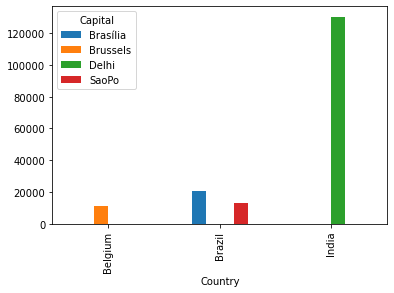

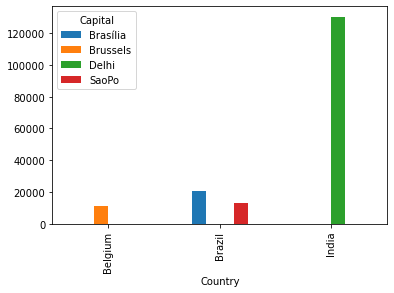

In [366]:
df2.plot.bar()
df2.plot(kind='bar')

In [371]:
import collections
c = collections.Counter('Ciyanna Ashish Patil')
print(c)
print('\n')
c.most_common

Counter({'i': 3, 'a': 3, 'n': 2, ' ': 2, 's': 2, 'h': 2, 'C': 1, 'y': 1, 'A': 1, 'P': 1, 't': 1, 'l': 1})




<bound method Counter.most_common of Counter({'i': 3, 'a': 3, 'n': 2, ' ': 2, 's': 2, 'h': 2, 'C': 1, 'y': 1, 'A': 1, 'P': 1, 't': 1, 'l': 1})>

In [ ]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
s3 = pd.Series([1,-3,4], index=['a','c','b'])
print(s,s3)
print(s+s3)
print(s.add(s3))
print(s.add(s3,fill_value=0))
print(s.sub(s3,fill_value=0)) # try 'mul', 'div'

In [374]:
lst = [['A'], ['A', 'B', 'C'], ['A', 'B']]
max(lst)

['A', 'B', 'C']

In [ ]:
print(np.zeros((3,4)))
print(np.ones((2,3,4)))
print(np.arange(10,25,4))
print(np.linspace(0,10,11))

In [ ]:
print(np.full((3,4),7))
print(np.random.rand(3,5))
print(np.random.rand(2,3,5).ndim)
print(np.random.rand(2,3,5).size)

In [ ]:
print(np.random.rand(5,3))
print(np.random.rand(5,3).flatten())
print(np.random.rand(5,3).transpose())

In [1]:
import itertools
for p in itertools.permutations('ABCD'):
    print(p)

('A', 'B', 'C', 'D')
('A', 'B', 'D', 'C')
('A', 'C', 'B', 'D')
('A', 'C', 'D', 'B')
('A', 'D', 'B', 'C')
('A', 'D', 'C', 'B')
('B', 'A', 'C', 'D')
('B', 'A', 'D', 'C')
('B', 'C', 'A', 'D')
('B', 'C', 'D', 'A')
('B', 'D', 'A', 'C')
('B', 'D', 'C', 'A')
('C', 'A', 'B', 'D')
('C', 'A', 'D', 'B')
('C', 'B', 'A', 'D')
('C', 'B', 'D', 'A')
('C', 'D', 'A', 'B')
('C', 'D', 'B', 'A')
('D', 'A', 'B', 'C')
('D', 'A', 'C', 'B')
('D', 'B', 'A', 'C')
('D', 'B', 'C', 'A')
('D', 'C', 'A', 'B')
('D', 'C', 'B', 'A')


In [15]:
import numpy as np
import pandas as pd

pd.Series(np.random.choice(a=[1,2,3], p=[0.1,0.7,0.2],size=20)).value_counts()

2    14
1     4
3     2
dtype: int64

In [30]:
def next3 (x):
    return(x,x+1,x+2,x+3)

a,b,_,_ = next3(2)

print(a,b)
print(a,b,_,_)

2 3
2 3 5 5
